In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

RANDOM_SEED = 42

## Import Data

In [2]:
from sklearn.utils import shuffle

mcu = pd.read_csv("./data/mcu.csv")

min_line_count = 150

is_main_character = mcu["character"].value_counts() > min_line_count
is_main_character = is_main_character.rename("is main character", axis=0)

main_character_rows = is_main_character[mcu["character"]]
main_character_rows = main_character_rows.reset_index(drop=True)

mcu = mcu[main_character_rows]

y = mcu["character"].to_numpy().astype(str)
X = mcu["line"].to_numpy().astype(str)

X, y = shuffle(X, y, random_state=RANDOM_SEED)

X, y

(array(['Got it.', 'And terrifying.', 'What’s the delta rate?', ...,
        'I’m sorry. He seemed like a good man.', 'Heimdall, come on.',
        'I am a king!'], dtype='<U606'),
 array(['BRUCE BANNER', 'PEPPER POTTS', 'TONY STARK', ..., 'STEVE ROGERS',
        'THOR', 'LOKI'], dtype='<U12'))

## Models

In [3]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.svm import SVC

from sklearn import metrics

import matplotlib.pyplot as plt

In [4]:
cross_validator = StratifiedKFold(n_splits=5, random_state=RANDOM_SEED, shuffle=True)
score_method = "balanced_accuracy"

Let's create two models: one that uses a TFIDF transformer and one that does not. 

### Model 1 (without TDIDF)

In [7]:
pipe1 = Pipeline([('vect', CountVectorizer()), 
                  ('clf', SVC(random_state=RANDOM_SEED, verbose=True))])

parameters1 = {'vect__binary': [True, False],
              'vect__stop_words': [None, 'english'],
              'clf__C': [1e-3, 1e-2, 1e-1, 0, 1, 10, 100, 1000],
              'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'clf__degree': [2,3,4,5,6],
              'clf__gamma': ['scale', 'auto'],
              'clf__class_weight': [None, 'balanced'],
              'clf__max_iter': [-1, 100, 500, 1000, 10000]
              }

model1 = GridSearchCV(pipe1, parameters1, scoring=score_method, cv=cross_validator, n_jobs=-1, verbose=3)

results = cross_validate(model1, X, y, cv=cross_validator, scoring=score_method, return_estimator=True)

table = pd.DataFrame({score_method: results['test_score']})
table.index.name = "fold"
table.loc["mean"] = table[score_method].mean()
table.loc["std"] = table[score_method].std()
table.loc["max"] = table[score_method].max()

table

Fitting 5 folds for each of 16000 candidates, totalling 80000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1356 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2645 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3324 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5000 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 6788 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 7916 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 9240 tasks      | 

[LibSVM]Fitting 5 folds for each of 16000 candidates, totalling 80000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 572 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 1428 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 1996 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2720 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3396 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4268 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 5204 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 6204 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 7268 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 8396 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 9720 tasks      | 

[LibSVM]Fitting 5 folds for each of 16000 candidates, totalling 80000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2264 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3608 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4340 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 5196 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 6152 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 7112 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 8136 tasks      | 

[LibSVM]Fitting 5 folds for each of 16000 candidates, totalling 80000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2264 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3591 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4400 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 5268 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 6212 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 7160 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | 

[LibSVM]Fitting 5 folds for each of 16000 candidates, totalling 80000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4668 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 5468 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 6332 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 7260 tasks      | 

[LibSVM]

C:\Users\prest\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


,balanced_accuracy
fold,
0,0.189822
1,0.197010
2,0.233412
3,0.220606
4,0.219431
mean,0.212056
std,0.016151
max,0.233412


### Model 2 (with TDIDF)

In [10]:
pipe2 = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', SVC(random_state=RANDOM_SEED, verbose=True))])

parameters2 = {'vect__binary': [True, False],
              'vect__stop_words': [None, 'english'],
              'tfidf__norm': ['l1', 'l2'],
              'tfidf__use_idf': [True, False],
              'clf__C': [1e-3, 1e-2, 1e-1, 0, 1, 10, 100, 1000],
              'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'clf__degree': [2,3,4,5,6],
              'clf__gamma': ['scale', 'auto'],
              'clf__class_weight': [None, 'balanced'],
              'clf__max_iter': [-1, 500, 1000, 10000]}

model2 = GridSearchCV(pipe2, parameters2, scoring=score_method, cv=cross_validator, n_jobs=-1, verbose=3)

results = cross_validate(model2, X, y, cv=cross_validator, scoring=score_method, return_estimator=True)

table = pd.DataFrame({score_method: results['test_score']})
table.index.name = "fold"
table.loc["mean"] = table[score_method].mean()
table.loc["std"] = table[score_method].std()
table.loc["max"] = table[score_method].max()

table

Fitting 5 folds for each of 51200 candidates, totalling 256000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2336 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3800 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4472 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5520 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6632 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 7496 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 8736 tasks      | 

[LibSVM]

C:\Users\prest\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 51200 candidates, totalling 256000 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2336 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3800 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4472 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5520 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 6632 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 7496 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 8736 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 10040 tasks      | elapsed:  5.7

[LibSVM]

C:\Users\prest\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 51200 candidates, totalling 256000 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2336 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3800 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4472 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5520 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6632 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 7496 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 8736 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 10040 tasks      | elapsed:  5.5

[LibSVM]

C:\Users\prest\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 51200 candidates, totalling 256000 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2336 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3800 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4472 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5520 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 6632 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 7496 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 8700 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 10004 tasks      | elapsed:  5.7

[LibSVM]

C:\Users\prest\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 51200 candidates, totalling 256000 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 1820 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2300 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3728 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4400 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 5448 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 6539 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7424 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 8532 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 9836 tasks      | elapsed:  5.8m

[LibSVM]

,balanced_accuracy
fold,
0,0.203560
1,0.256632
2,0.214968
3,0.258141
4,0.233004
mean,0.233261
std,0.021827
max,0.258141


Looks like model 2 performed better.  Let's see it's confusion matrix on a random train / test split of the data in case there are any obvious patterns.

balanced_accuracy: 0.2535534831972497


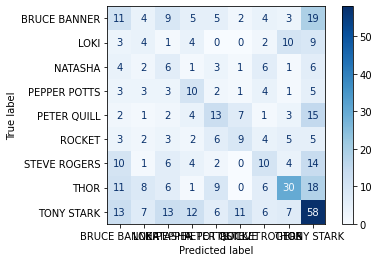

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

model2.fit(X_train,y_train)
yhat = model2.predict(X_test)

print("balanced_accuracy:", metrics.balanced_accuracy_score(y_test, yhat))

plot = metrics.plot_confusion_matrix(model2, X_test, y_test,
                             values_format = 'd',
                             cmap=plt.cm.Blues)

In [17]:
model2.best_params_

{'clf__C': 10,
 'clf__class_weight': 'balanced',
 'clf__degree': 2,
 'clf__gamma': 'scale',
 'clf__kernel': 'linear',
 'clf__max_iter': 1000,
 'tfidf__norm': 'l1',
 'tfidf__use_idf': False,
 'vect__binary': False,
 'vect__stop_words': 'english'}

## Learning Curve

Do we have enough training examples?  Let's find out.

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, verbose=3)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")

    return plot

In [ ]:
from sklearn.model_selection import learning_curve

title = "Learning Curves (Linear SVM)"

plot_learning_curve(model2, title, X, y, cv=cross_validator)

## Conclusions

It appears to me that these scores in the learning curve have not converged, which suggests that more training examples might yield better performance on this model.  Each character has relatively few words spoken compared to other problems Naive Bayes (NB) might be good at.  For example, Tony Stark only speaks 7600 words in the whole dataset.  Is this too few to train and test on? Also, the balanced accuracy shown in the tables above show very poor performance.  I'm willing to bet this could be because of how little data I have.  However, there is a chance that NB just doesn't work well on this dataset.  In general, movie characters will be discussing similar topics (the plot of the movie), which might make it hard to distinguish character using a bag of words model like NB.

I'm going to try a different model first (most likely SVM or Random Forest), and then, if needed, I'll add more movies to the dataset and retry Naive Bayes.